### 선형모델
- 데이터를 확인하고 그것과 관련된 선을 찾는 알고리즘
- 분류 : 경계선을 찾는다.
- 회귀 : 예측선을 찾는다.

In [32]:
df2["traget"] = y_pred
df2.to_csv("data/boston_KNN.csv")
print("저장완료")

저장완료


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = 20 ,10
plt.rcParams["axes.unicode_minus"] = False
# %matplotlib notebook

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# 분류 classification

### 데이터 준비

In [2]:
df1 = pd.read_csv("data/breast_cancer.csv")
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop("target", axis=1)
y = df1["target"]

display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [4]:
# 인코딩
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [5]:
# 입력 데이터에 대한 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

### 기본 모델 사용

- LogisticRegression : 경계선과 가장 가까운 데이터와의 거리가 가장 가까울 수 있도록 경계선을 찾는다.
- SVM(SVC) : 경계선과 가장 가까운 데이터와의 거리가 가장 멀 수 있도록 경계선을 찾는다.

In [6]:
model1 = LogisticRegression()

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y , scoring="f1", cv=kfold)
print(f"평균 정확도 : {r1.mean()}")

평균 정확도 : 0.9593106861175917


In [7]:
model1 = SVC()

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 정확도 : {r1.mean()}')

평균 정확도 : 0.953985332295529


### 모델 하이퍼 파라미터 튜닝
- 아무것도 설정을 안하면 직선을 찾으려고 한다.
- 직선을 점점 곡선으로 만들기 위해 하이퍼 파라미터를 튜닝
- 규제 : 선형 모델은 직선을 찾으려고 한다. 따라서 규제를 통해 직선을 다른 형태로 변형할 수 있습니다.
- l2 규제 : 각 가중치(학습을 통해 찾아내야 하는 상수들)의 제곱한 값의 합에 규제 강도를 곱한다. 규제 강도를 크게 하면 가중치가 더 많이 감소되고 규제 강도를 작게하면 가중치가 증가한다.
- l1 규제 : 각 가중치의 합에 규제 강도를 곱한다.

In [8]:
# LogisticRegression
# penalty : 규제의 종류(l1, l2, elasticnet(l1,l2 모두 사용하는것), none)
# C: 규제의 강도 
params = {
    "penalty" : ["l1", "l2", "elasticnet", "none"],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model1 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring="f1", cv=kfold)
grid_clf1.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")

최적의 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.9688344223775708


In [9]:
# SVM(SVC)
# SVM은 l2로 penalty가 고정되어 있다.
# C: 규제의 강도 
params = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring="f1", cv=kfold)
grid_clf2.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf2.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf2.best_score_}")

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.953985332295529


### 최적의 모델에 전체 데이터를 학습 시킨다.

In [10]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다
best_model1 = grid_clf1.best_estimator_
best_model2 = grid_clf2.best_estimator_

# SVM인 경우 확률을 찍어보기 위해선 다음과 같은 값을 설정해야 한다.
best_model2.probability = True

# 학습
best_model1.fit(X,y)
best_model2.fit(X,y)

SVC(C=1, probability=True)

### 학습한 데이터를 통해 검증을 한다.

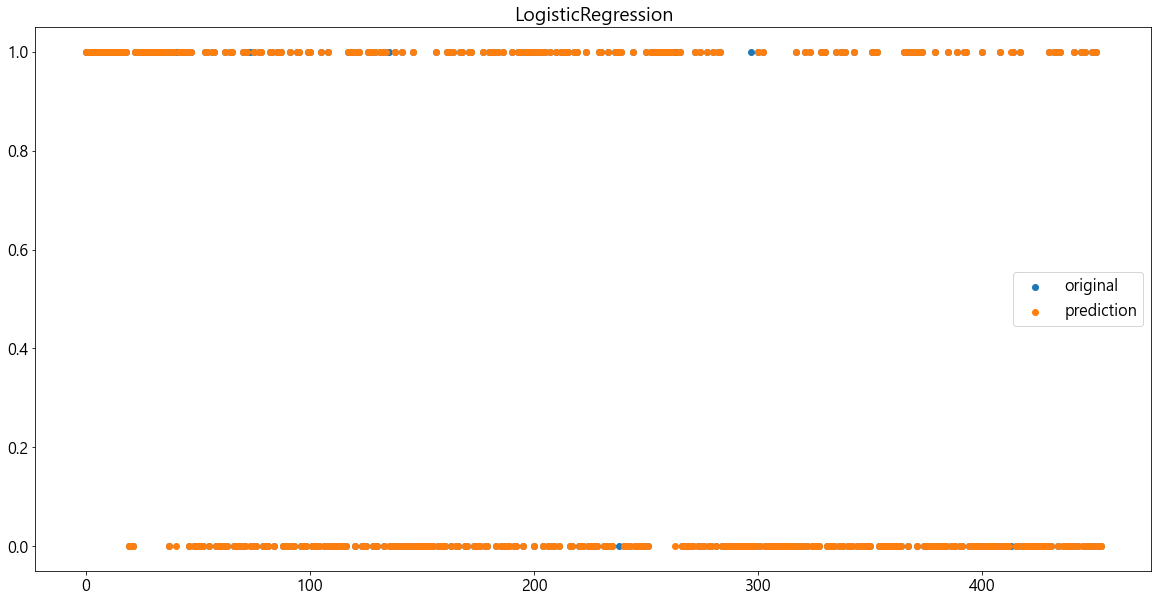

In [11]:
y_pred1 = best_model1.predict(X)
# %matplotlib notebook
plt.scatter(list(range(len(y))), y, label="original")
plt.scatter(list(range(len(y_pred1))), y_pred1, label="prediction")
plt.legend()
plt.title("LogisticRegression")
plt.show()

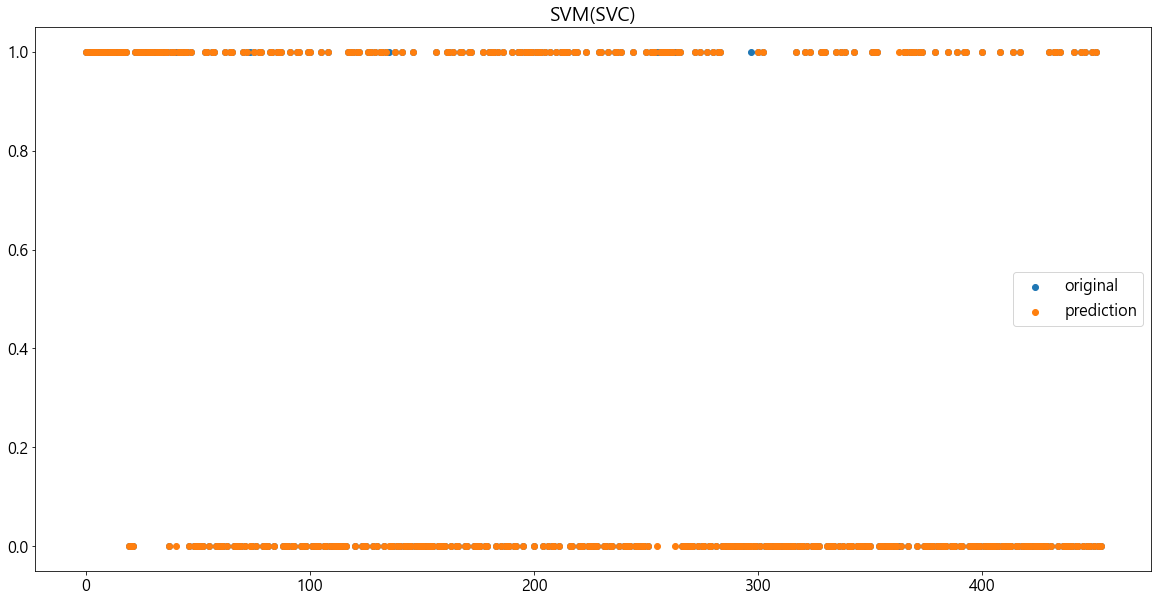

In [12]:
y_pred2 = best_model2.predict(X)

plt.scatter(list(range(len(y))), y, label="original")
plt.scatter(list(range(len(y_pred2))), y_pred2, label="prediction")
plt.legend()
plt.title("SVM(SVC)")
plt.show()

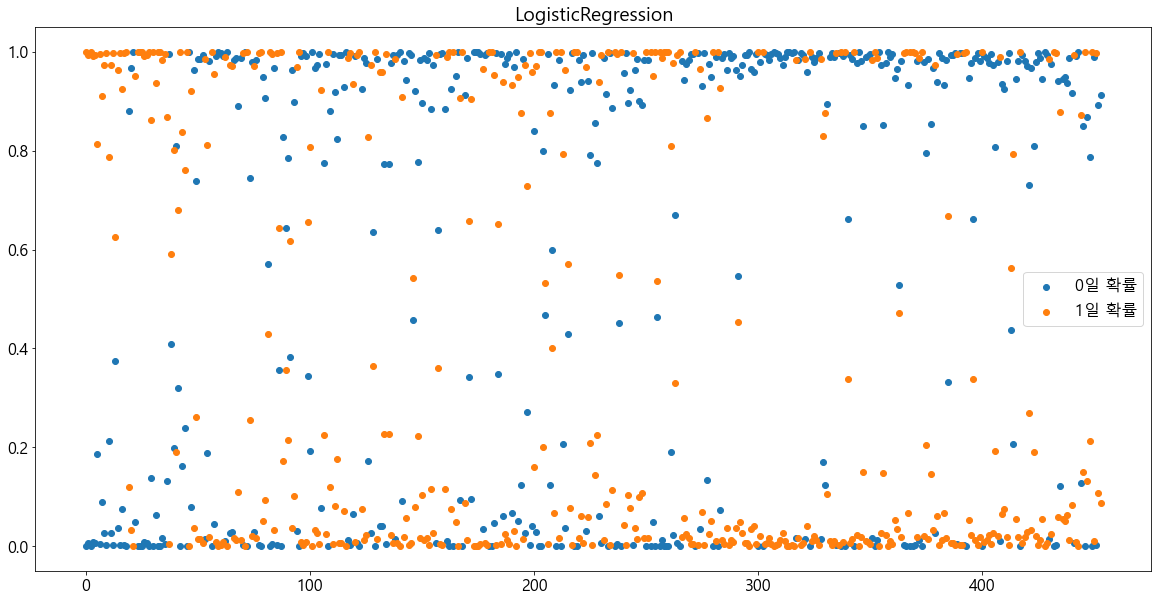

In [13]:
# 결과 확률
proba_a1 = best_model1.predict_proba(X)

# 0일 확률
a10 = proba_a1[:, 0]
# 1일 확률
a11 = proba_a1[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일 확률")
plt.scatter(list(range(len(a11))), a11, label="1일 확률")

plt.legend()
plt.title('LogisticRegression')
plt.show()

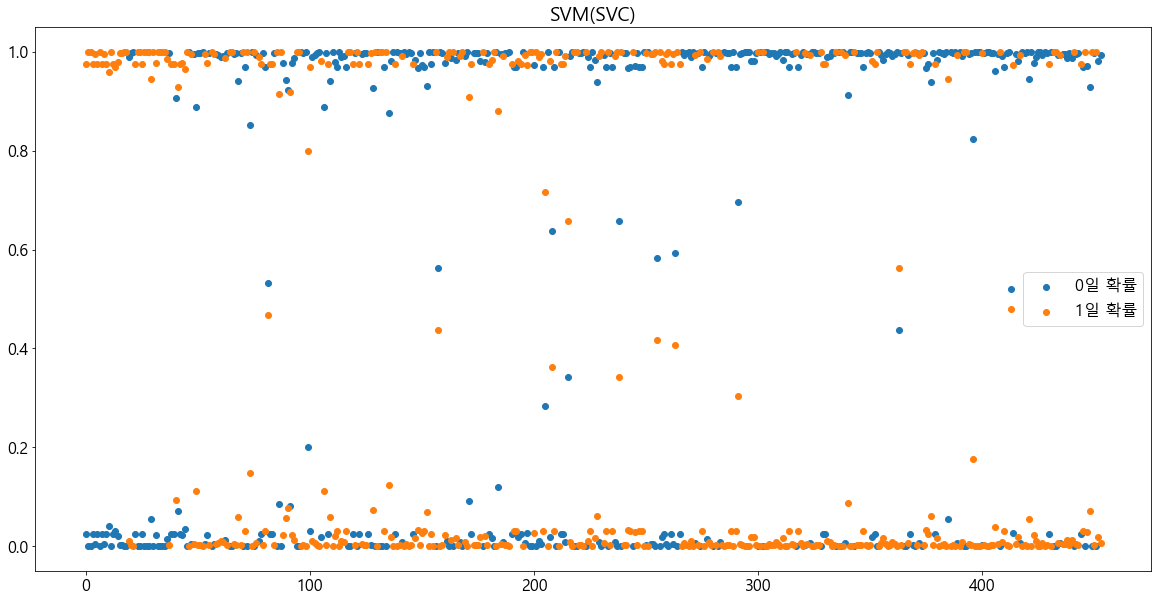

In [14]:
# 결과 확률
proba_a2 = best_model2.predict_proba(X)

# 0일 확률
a10 = proba_a2[:, 0]
# 1일 확률
a11 = proba_a2[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일 확률")
plt.scatter(list(range(len(a11))), a11, label="1일 확률")

plt.legend()
plt.title('SVM(SVC)')
plt.show()

### 새로운 데이터에 대한 예측을 수행한다.

In [15]:
df2 = pd.read_csv('data/breast_cancer_new.csv')
df2.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291


In [16]:
# 데이터 표준화
scaled_data = scaler1.transform(df2)
scaled_data


array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [17]:
# 결과를 예측한다.
y_pred1 = best_model1.predict(scaled_data)
y_pred2 = best_model2.predict(scaled_data)

display(y_pred1)
display(y_pred2)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

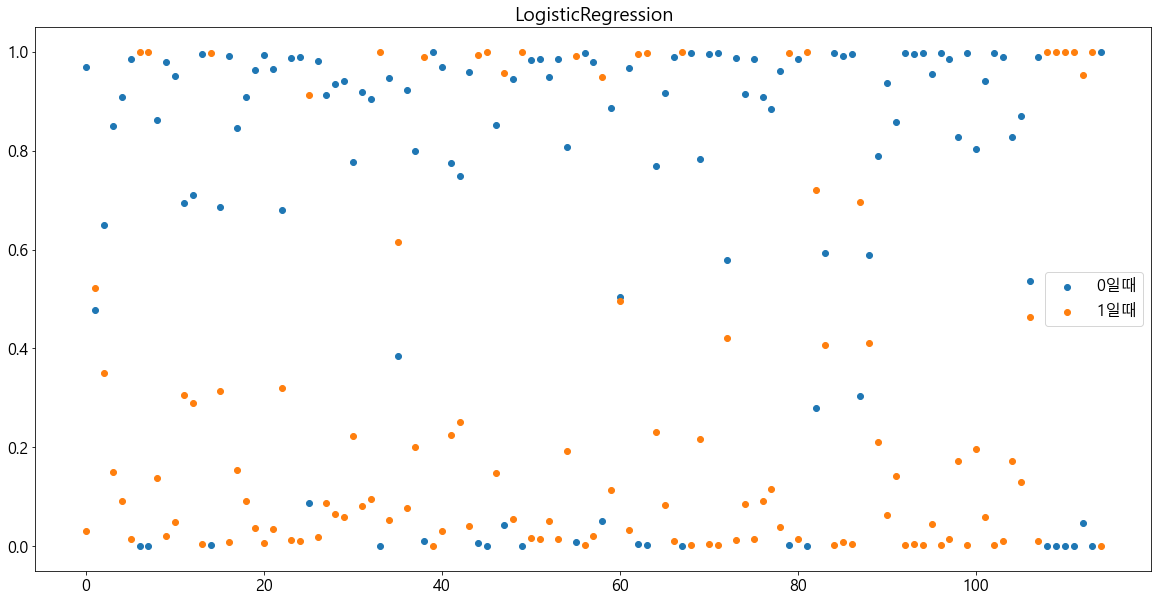

In [18]:
# 예측 확률을 시각화한다.
proba_data = best_model1.predict_proba(scaled_data)

# 0일 확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일때")
plt.scatter(list(range(len(a11))), a11, label="1일때")
plt.legend()
plt.title("LogisticRegression")
plt.show()

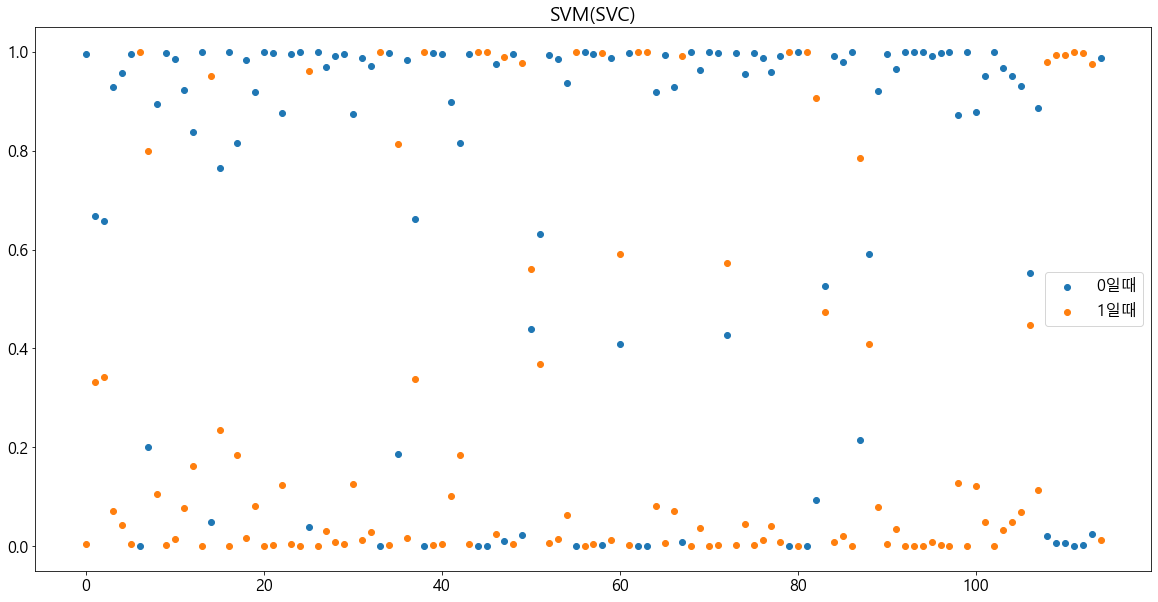

In [19]:
# 예측 확률을 시각화한다.
proba_data = best_model2.predict_proba(scaled_data)

# 0일 확률과 1일 확률 값을 각각 가져온다.
a10 = proba_data[:, 0]
a11 = proba_data[:, 1]

plt.scatter(list(range(len(a10))), a10, label="0일때")
plt.scatter(list(range(len(a11))), a11, label="1일때")
plt.legend()
plt.title("SVM(SVC)")
plt.show()

In [20]:
# 결과 데이터를 복원한다
result_data1 = encoder1.inverse_transform(y_pred1)
result_data2 = encoder1.inverse_transform(y_pred2)

display(result_data1)
display(result_data2)

array(['benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'beni

array(['benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant',

In [21]:
# 결과를 저장한다.
df2["target"] = result_data1
df2.to_csv('data/breast_cancer_LR.csv')

df2["target"] = result_data2
df2.to_csv('data/breast_cancer_SVC.csv')

print("저장완료")

저장완료


# 회귀
- LinearRegression : 가장 기본적인 선형 회귀. 규제함수가 없다.
- Ridge : LinearRegression에 규제함수 l2 를 추가한것.
- Lasso : LinearRegression에 규제함수 l1 을 추가한것.
- ElasticNet : Ridge와 Lasso의 결합
- SVM(SVR) : 서브벡터머신 방식으로 회귀를 수행한다.

### 데이터를 준비한다.

In [22]:
df1 = pd.read_csv("data/boston.csv")
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


### 결과와 입력을 나눈다.

In [23]:
X = df1.drop("target", axis=1)
y = df1["target"]

display(X)
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64

### 데이터 전처리

In [24]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

### 기본 모델 사용하기

In [25]:
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()
model4 = ElasticNet()
model5 = SVR()

# 교차 검증 수행
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring="r2", cv=kfold)
r2 = cross_val_score(model2, X, y, scoring="r2", cv=kfold)
r3 = cross_val_score(model3, X, y, scoring="r2", cv=kfold)
r4 = cross_val_score(model4, X, y, scoring="r2", cv=kfold)
r5 = cross_val_score(model5, X, y, scoring="r2", cv=kfold)

print(f"평균 성능 수치 : {r1.mean()}")
print(f"평균 성능 수치 : {r2.mean()}")
print(f"평균 성능 수치 : {r3.mean()}")
print(f"평균 성능 수치 : {r4.mean()}")
print(f"평균 성능 수치 : {r5.mean()}")

평균 성능 수치 : 0.8509777564842589
평균 성능 수치 : 0.8510047417482983
평균 성능 수치 : 0.7967879509364957
평균 성능 수치 : 0.7459387927966984
평균 성능 수치 : 0.6398944457914795


### 모델 하이퍼 파라미터 튜닝

In [26]:
# LinearRegression
# LinearRegression은 규제 함수가 존재하지 않기 때문에 설정할 하이퍼 파라미터가 존재하지 않는다.

In [27]:
# Ridge 
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring="r2", cv=kfold)
grid_clf2.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf2.best_params_}")
print(f"최적의 모델 평균성능 : {grid_clf2.best_score_}")

최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균성능 : 0.8510047417482983


In [28]:
# Lasso 
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring="r2", cv=kfold)
grid_clf3.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf3.best_params_}")
print(f"최적의 모델 평균성능 : {grid_clf3.best_score_}")

최적의 하이퍼 파라미터 : {'alpha': 0.0001}
최적의 모델 평균성능 : 0.8509776005061424


In [29]:
# ElasticNet 
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model4 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring="r2", cv=kfold)
grid_clf4.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf4.best_params_}")
print(f"최적의 모델 평균성능 : {grid_clf4.best_score_}")

최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균성능 : 0.8509925475043933


In [30]:
# SVM(SVR) 
# C : 규제의 강도
params = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model5 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring="r2", cv=kfold)
grid_clf5.fit(X, y)
print(f"최적의 하이퍼 파라미터 : {grid_clf5.best_params_}")
print(f"최적의 모델 평균성능 : {grid_clf5.best_score_}")

최적의 하이퍼 파라미터 : {'C': 100}
최적의 모델 평균성능 : 0.9086789533233992


### 최적의 모델에 전체 데이터를 학습 시킨다.

In [31]:
best_model1 = LinearRegression()
best_model2 = grid_clf2.best_estimator_
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_

print(best_model1)
print(best_model2)
print(best_model3)
print(best_model4)
print(best_model5)

LinearRegression()
Ridge(alpha=1)
Lasso(alpha=0.0001)
ElasticNet(alpha=0.01)
SVR(C=100)


In [32]:
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)

SVR(C=100)

### 학습 데이터를 가지고 검증을 한다.

In [33]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)


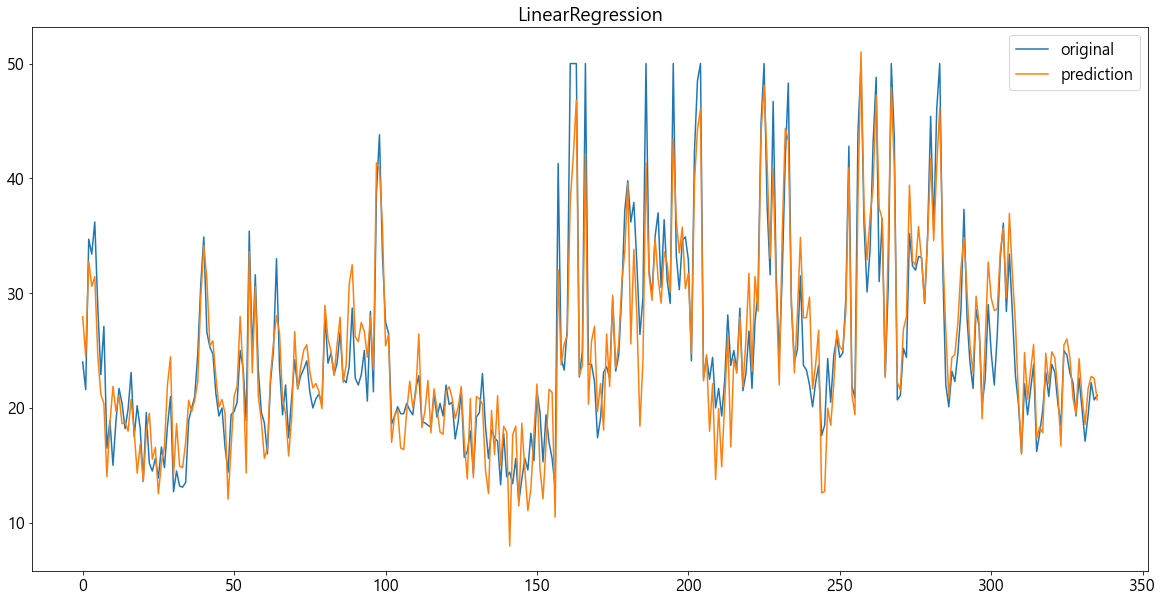

In [34]:
# 진짜 결과와 예측 결과를 시각화 하여 패턴을 확인한다.
plt.plot(y, label="original")
plt.plot(y_pred1, label="prediction")
plt.legend()
plt.title("LinearRegression")
plt.show()

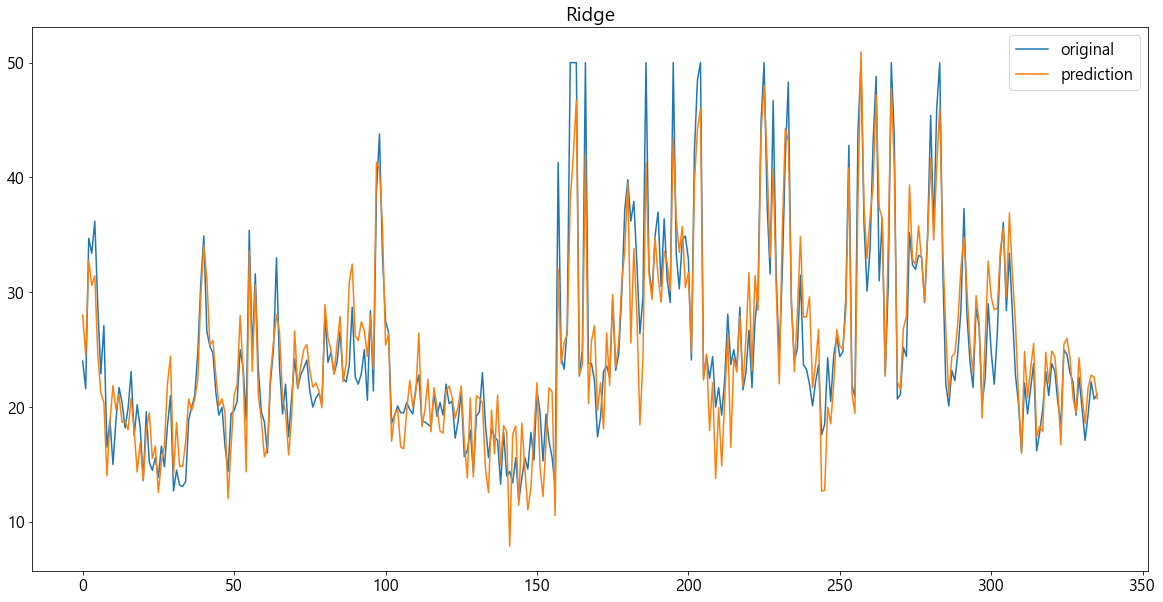

In [35]:
# 진짜 결과와 예측 결과를 시각화 하여 패턴을 확인한다.
plt.plot(y, label="original")
plt.plot(y_pred2, label="prediction")
plt.legend()
plt.title("Ridge")
plt.show()

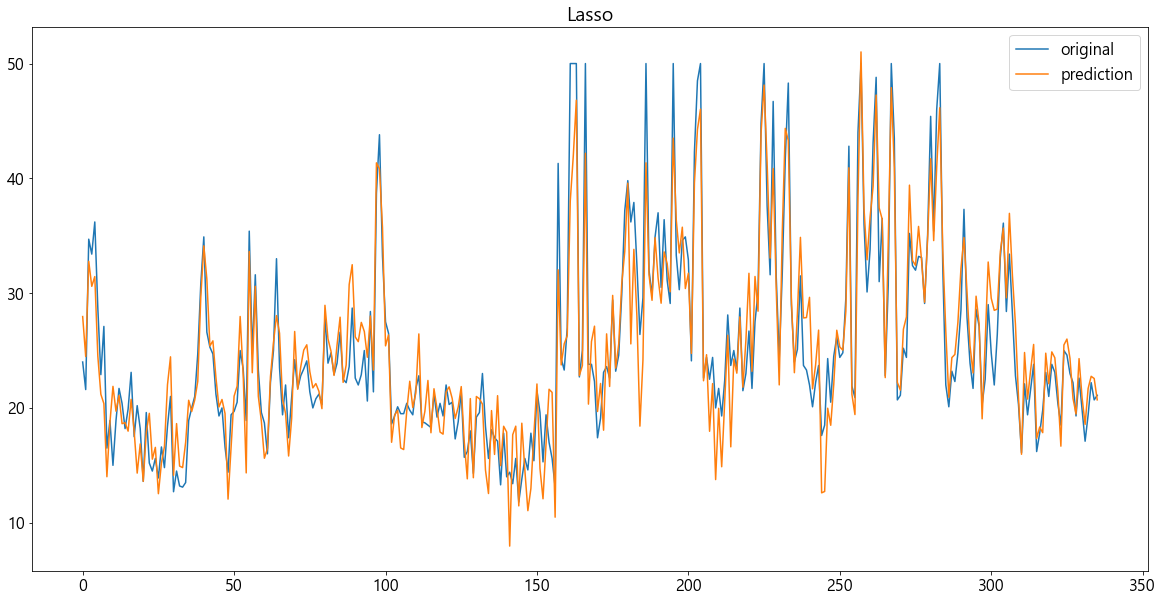

In [36]:
# 진짜 결과와 예측 결과를 시각화 하여 패턴을 확인한다.
plt.plot(y, label="original")
plt.plot(y_pred3, label="prediction")
plt.legend()
plt.title("Lasso")
plt.show()

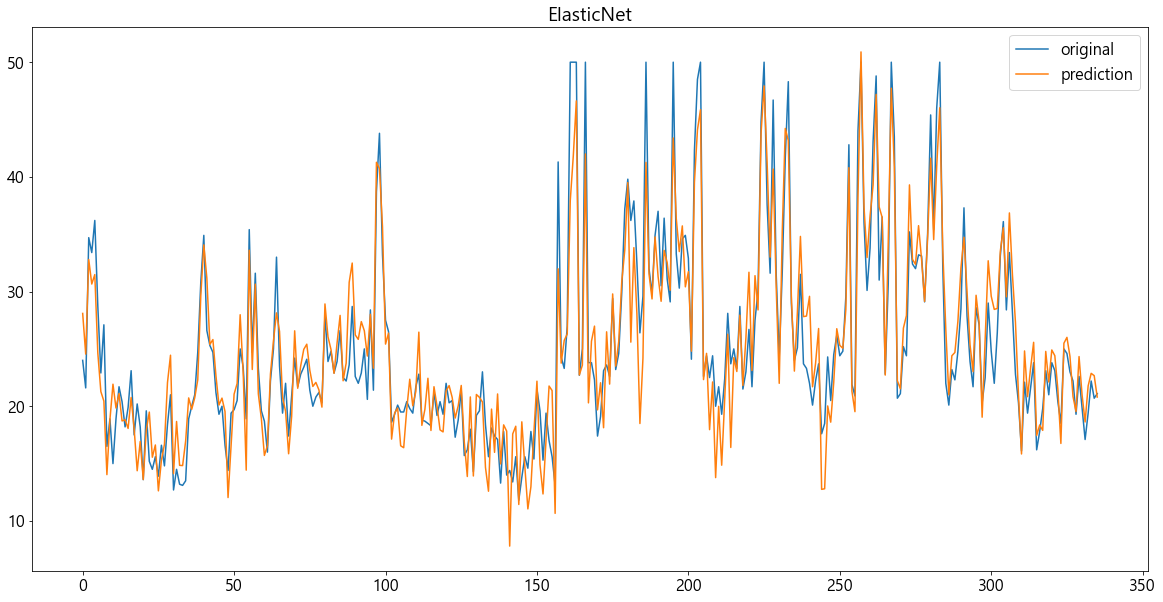

In [37]:
# 진짜 결과와 예측 결과를 시각화 하여 패턴을 확인한다.
plt.plot(y, label="original")
plt.plot(y_pred4, label="prediction")
plt.legend()
plt.title("ElasticNet")
plt.show()

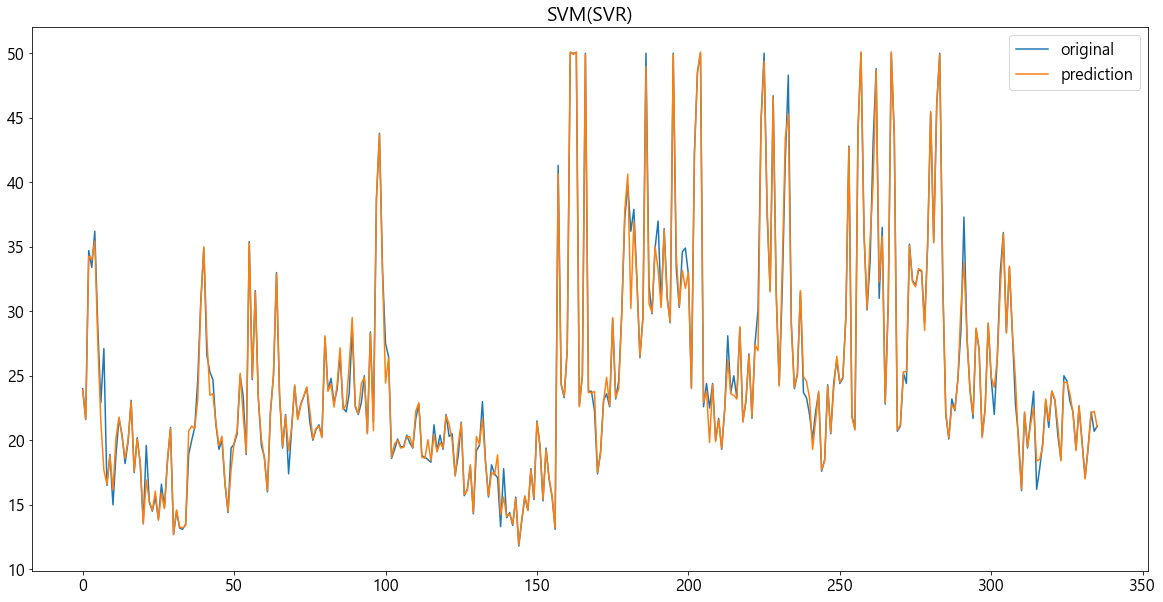

In [39]:
# 진짜 결과와 예측 결과를 시각화 하여 패턴을 확인한다.
plt.plot(y, label="original")
plt.plot(y_pred5, label="prediction")
plt.legend()
plt.title("SVM(SVR)")
plt.show()

# 예측 결과 추출

In [40]:
df2 = pd.read_csv("data/boston_new.csv")
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29


### 데이터 전처리

In [41]:
scaled_data = scaler1.transform(df2)
scaled_data

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

### 예측 결과 추출

In [45]:
y_pred1 = best_model1.predict(scaled_data)
y_pred2 = best_model2.predict(scaled_data)
y_pred3 = best_model3.predict(scaled_data)
y_pred4 = best_model4.predict(scaled_data)
y_pred5 = best_model5.predict(scaled_data)


### 저장

In [46]:
df2["target"] = y_pred1
df2.to_csv("data/boston_LinearRegression.csv")

df2["target"] = y_pred2
df2.to_csv("data/boston_Ridge.csv")

df2["target"] = y_pred3
df2.to_csv("data/boston_Lasso.csv")

df2["target"] = y_pred4
df2.to_csv("data/boston_ElasticNet.csv")

df2["target"] = y_pred5
df2.to_csv("data/boston_SVR.csv")

print("저장완료")

저장완료
